#### Load Libraries

In [17]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

#### Load Dataset

In [2]:
df = pd.read_csv('Play Tennis.csv')

In [3]:
df.head()

,Day,Outlook,Temprature,Humidity,Wind,Play_Tennis
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


#### Basic EDA

In [5]:
print(f'Number of row: {df.shape[0]}')
print(f'Number of column: {df.shape[1]}')

Number of row: 14
Number of column: 6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Day          14 non-null     object
 1   Outlook      14 non-null     object
 2   Temprature   14 non-null     object
 3   Humidity     14 non-null     object
 4   Wind         14 non-null     object
 5   Play_Tennis  14 non-null     object
dtypes: object(6)
memory usage: 800.0+ bytes


In [7]:
df.isnull().sum()

Day            0
Outlook        0
Temprature     0
Humidity       0
Wind           0
Play_Tennis    0
dtype: int64

#### Data Preprocessing

In [11]:
from sklearn import preprocessing
string_to_int = preprocessing.LabelEncoder()

df = df.apply(string_to_int.fit_transform)

In [12]:
df.head()

,Day,Outlook,Temprature,Humidity,Wind,Play_Tennis
0,0,2,1,0,1,0
1,6,2,1,0,0,0
2,7,0,1,0,1,1
3,8,1,2,0,1,1
4,9,1,0,1,1,1


In [14]:
features = ['Day', 'Outlook', 'Temprature', 'Humidity', 'Wind']
X = df.drop('Play_Tennis', axis=1)
y = df['Play_Tennis']

#### Splitting Data

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### Building Model

In [28]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion="entropy")

model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

#### Evaluating Model

In [21]:
y_predict = model.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predict)

print(f'Accuracy : {accuracy: 0.2f}')

Accuracy :  0.60


In [24]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.50      1.00      0.67         2

    accuracy                           0.60         5
   macro avg       0.75      0.67      0.58         5
weighted avg       0.80      0.60      0.57         5

[[1 2]
 [0 2]]


#### Visualizing Decision Tree

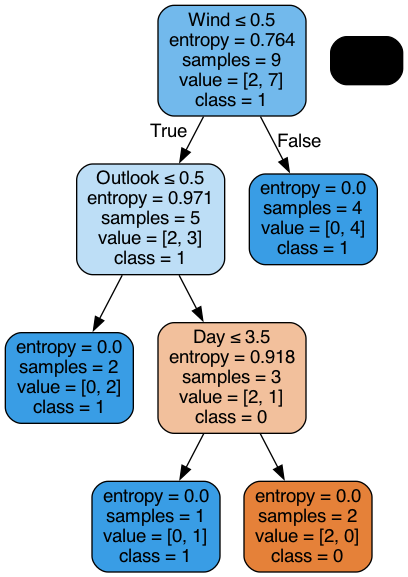

In [29]:
from sklearn.tree import export_graphviz
import graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data, filled=True, rounded=True, special_characters=True,
                feature_names=features, class_names=['0', '1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Play Tennis.png')
Image(graph.create_png())